In [1]:
from pathlib import Path
import pandas as pd

In [2]:
# Specify I/O paths
path_input: Path = Path("../../../data/original/adni/VITALS_14Jul2023.csv").resolve()
path_output: Path = Path("../../../data/processed/adni/bmi.csv").resolve()

### Height

In [3]:
# Specify height columns
usecols_ht: list[str] = ["RID", "VSHEIGHT", "VSHTUNIT"]

In [4]:
# Read height columns
height: pd.DataFrame = pd.read_csv(
    path_input, usecols=usecols_ht
).dropna()  # .drop_duplicates().convert_dtypes()

In [5]:
# Keep only valid height values
height: pd.DataFrame = height.loc[
    (height["VSHEIGHT"] > 0) & (height["VSHTUNIT"] > 0)
].reset_index(drop=True)

In [6]:
# Convert height to cm
height["height"] = height["VSHEIGHT"]
height.loc[height["VSHTUNIT"] == 1, "height"] = (
    height.loc[height["VSHTUNIT"] == 1, "VSHEIGHT"] * 2.54
)

In [7]:
# Keep only valid height values
height_lower_bound: float = 115
height_upper_bound: float = 215
height: pd.DataFrame = height.loc[
    (height["height"] > height_lower_bound) & (height["height"] < height_upper_bound)
]

In [8]:
# Keep the mean height for each participant
height: pd.DataFrame = (
    height.groupby("RID")
    .agg({"height": "mean"})
    .reset_index(drop=False)
    .sort_values("RID")
)

<Axes: >

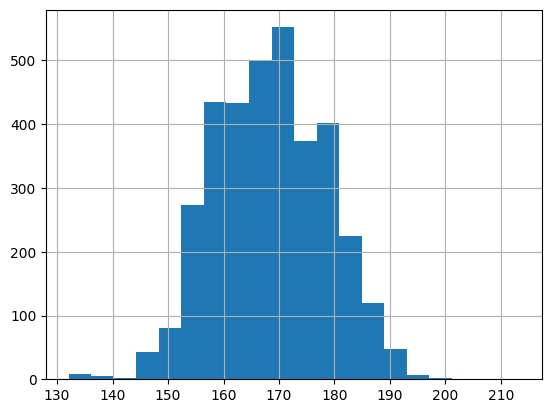

In [9]:
# Display height distribution
height["height"].hist(bins=20)

### Weight

In [10]:
# Specify weight columns
usecols_wt: list[str] = ["RID", "VSWEIGHT", "VSWTUNIT"]

In [11]:
# Read weight columns
weight: pd.DataFrame = (
    pd.read_csv(path_input, usecols=usecols_wt)
    .dropna()
    .drop_duplicates()
    .convert_dtypes()
)

In [12]:
# Keep only valid weight values
weight: pd.DataFrame = weight.loc[
    (weight["VSWEIGHT"] > 0) & (weight["VSWTUNIT"] > 0)
].reset_index(drop=True)

In [13]:
# Convert weight to kg
weight["weight"] = weight["VSWEIGHT"]
weight.loc[weight["VSWTUNIT"] == 1, "weight"] = (
    weight.loc[weight["VSWTUNIT"] == 1, "VSWEIGHT"] * 0.453592
)

In [14]:
# Keep only valid weight values
weight_lower_bound: float = 35
weight_upper_bound: float = 200
weight: pd.DataFrame = weight.loc[
    (weight["weight"] > weight_lower_bound) & (weight["weight"] < weight_upper_bound)
]

In [15]:
# Keep the mean weight for each participant
weight: pd.DataFrame = (
    weight.groupby("RID")
    .agg({"weight": "mean"})
    .reset_index(drop=False)
    .sort_values("RID")
)

<Axes: >

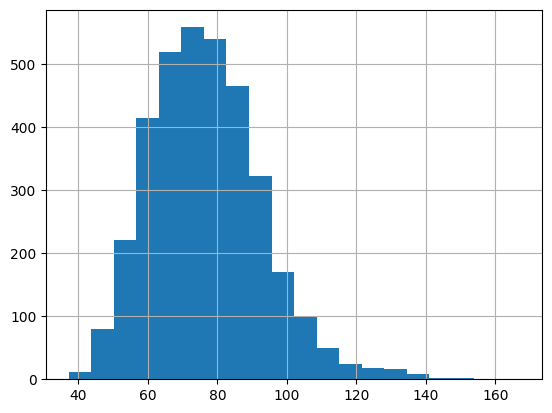

In [16]:
# Display weight distribution
weight["weight"].hist(bins=20)

### BMI

In [17]:
# Join height and weight data, and calculate BMI
bmi: pd.DataFrame = height.join(weight.set_index("RID"), on="RID", how="inner")
bmi["bmi"] = bmi["weight"] / ((bmi["height"] / 100) ** 2)
bmi: pd.DataFrame = bmi.sort_values(by="RID", ascending=True).reset_index(drop=True)

<Axes: >

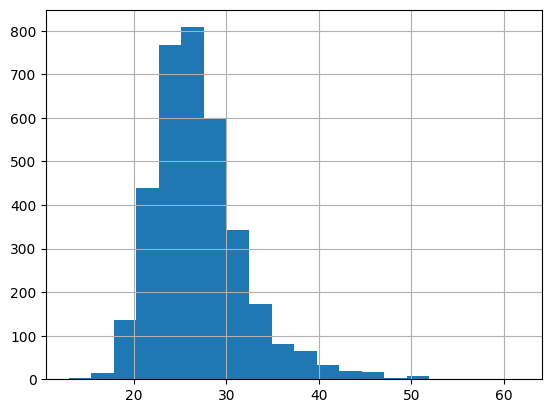

In [18]:
# Display BMI distribution
bmi["bmi"].hist(bins=20)

### Output

In [19]:
# Subset columns
bmi: pd.DataFrame = bmi[["RID", "bmi"]]

In [20]:
# Save to CSV
bmi.to_csv(path_output, index=False)